Creation and manipulation of time coverages (TMOCs)
======

First import the relevant packages, we will need the TimeMOC class of mocpy and astropy Time/TimeDelta:

In [2]:
from astropy.time import Time, TimeDelta
from astroquery.vizier import Vizier
from mocpy import TimeMOC

Loading a time coverage (TMOC)
------

From a FITS file:

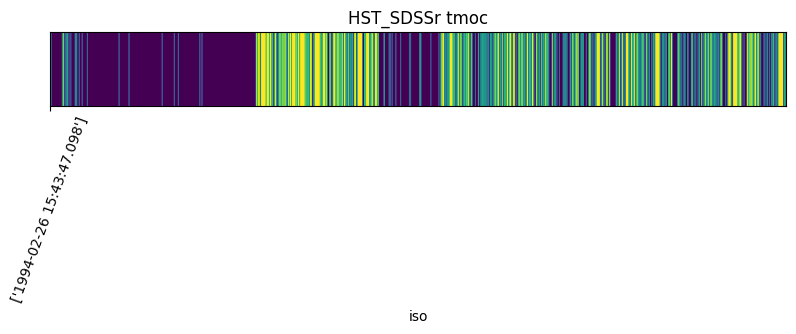

In [3]:
time_moc = TimeMOC.from_fits(
    "http://alasky.u-strasbg.fr/HST-hips/filter_SDSSr_hips/TMoc.fits",
)
# Display it
time_moc.plot(title="HST_SDSSr tmoc")

From an astropy table:

In [4]:
viz = Vizier(columns=["*", "_RAJ2000", "_DEJ2000"])
viz.ROW_LIMIT = -1
table = viz.get_catalogs("II/285")[1]

print(table)

 Name  Ref      JD       Vmag  U-B  B-V    V-Rc  Rc-Ic  V-Ic 
                d        mag   mag  mag    mag    mag   mag  
------ --- ------------ ------ --- ------ ------ ----- ------
 T ANT 978 2443914.3750     --  --  0.802  0.391    --  0.856
 T ANT 978 2443915.4410     --  --  0.861  0.460    --  0.803
 T ANT 978 2444297.4250  9.360  --  0.791  0.431    --  0.840
   ... ...          ...    ... ...    ...    ...   ...    ...
NN VUL 950 2445211.2031 14.186  --  1.528     --    --     --
NN VUL 950 2445212.2304 14.227  --  1.588     --    --     --
NN VUL 950 2445213.2109 14.293  --  1.574     --    --     --
NN VUL 950 2445214.2109 14.408  --  1.524     --    --     --
Length = 70031 rows


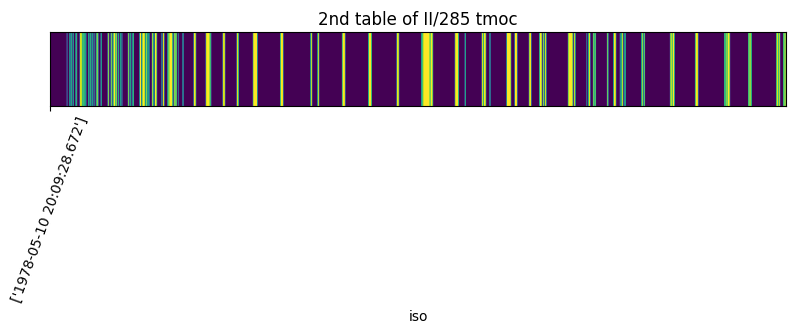

Time of the first observation: ['1978-05-10 20:09:28.672']
Time of the last observation: ['2004-04-22 16:56:36.350']
Total duration: 227.42448355555555 jd
max order: 31
CPU times: user 183 ms, sys: 6.4 ms, total: 189 ms
Wall time: 137 ms


In [5]:
%%time
table_moc = TimeMOC.from_times(Time(table["JD"], format="jd", scale="tdb"))
table_moc.plot(title="2nd table of II/285 tmoc")

# print characteristics such as the time of the first/last observations
print("Time of the first observation:", table_moc.min_time.iso)
print("Time of the last observation:", table_moc.max_time.iso)
# the total duration of the observation times
print(f"Total duration: {table_moc.total_duration.jd} jd")
# the order of the TimeMoc
print("max order:", table_moc.max_order)

Filtering an astropy table with a TimeMoc
------

In [6]:
# filtering the table through the tmoc created from the HST_SDSSr fits file
rows = time_moc.contains_with_timeresolution(
    times=Time(table["JD"], format="jd", scale="tdb"),
    keep_inside=True,
    delta_t=TimeDelta(3600, format="sec", scale="tdb"),
)
print(table["JD"][rows])

     JD     
     d      
------------
2453021.3273
2453022.4863
2453022.5731
         ...
2453022.3294
2453022.4841
2453022.5714
2453022.4899
Length = 233 rows


Operation between TMOCs
-----

Let's intersect the two coverages we already have i.e. the one from HST_SDSSr with the one we got from VizieR:

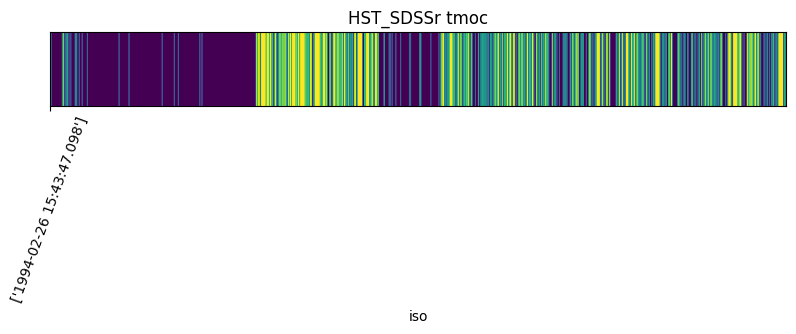

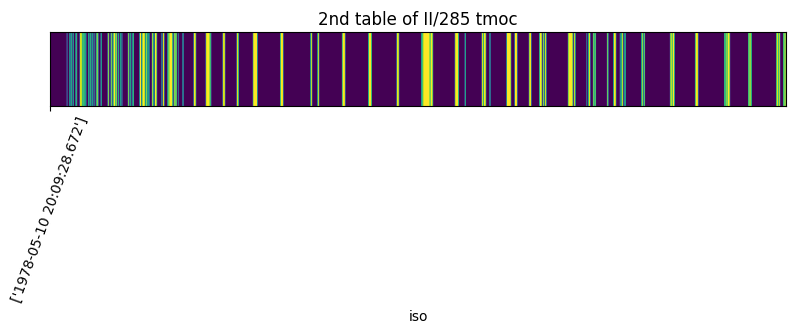

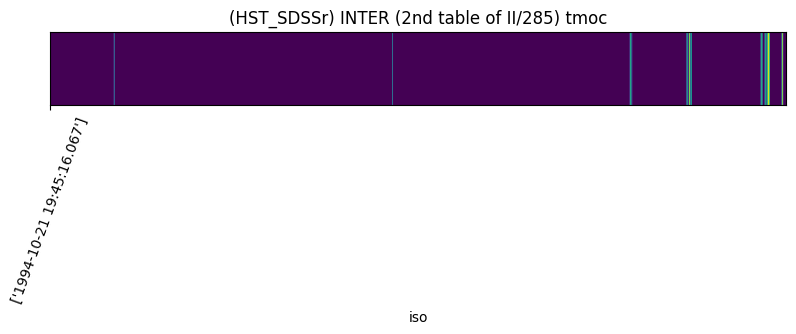

HST_SDSSr max order :  41
2nd table of II/285 max order :  31
(HST_SDSSr) INTER (2nd table of II/285) max order :  25


In [7]:
result = table_moc.intersection_with_timeresolution(
    time_moc,
    delta_t=TimeMOC.order_to_time_resolution(25),
)

time_moc.plot(title="HST_SDSSr tmoc")
table_moc.plot(title="2nd table of II/285 tmoc")
result.plot(title="(HST_SDSSr) INTER (2nd table of II/285) tmoc")

# print the max order of all the tmocs. Result tmoc must be of order 9
print("HST_SDSSr max order : ", time_moc.max_order)
print("2nd table of II/285 max order : ", table_moc.max_order)
print("(HST_SDSSr) INTER (2nd table of II/285) max order : ", result.max_order)

We can augment and/or diminish a time coverage. This may be useful to see if surveys, even if not coinciding perfectly, may have been done at very close observational times. 

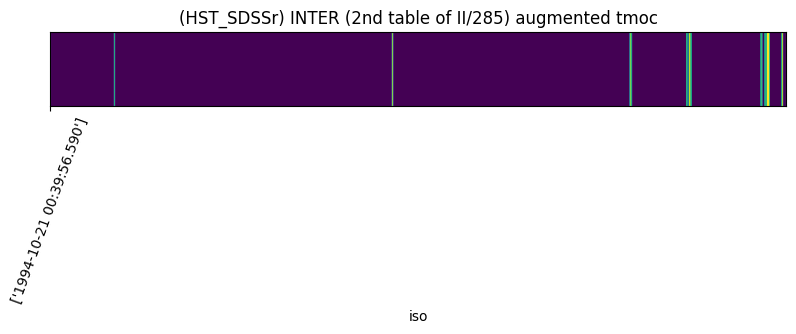

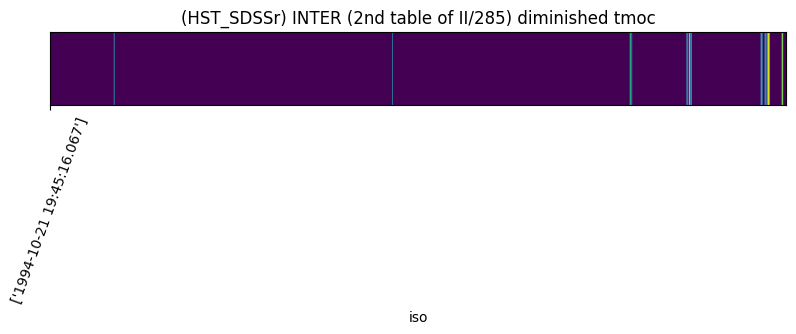

In [8]:
result.add_neighbours()
result.plot(title="(HST_SDSSr) INTER (2nd table of II/285) augmented tmoc")

result.remove_neighbours()
result.plot(title="(HST_SDSSr) INTER (2nd table of II/285) diminished tmoc")

Complement of a TimeMoc

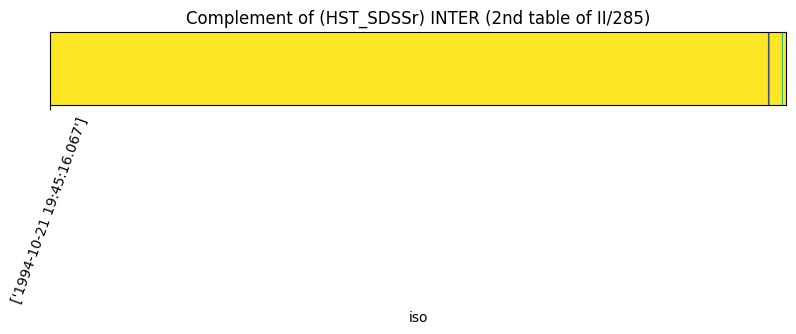

In [9]:
complemented_tmoc = result.complement()
complemented_tmoc.plot(
    title="Complement of (HST_SDSSr) INTER (2nd table of II/285)",
    view=(result.min_time, result.max_time),
)